In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score
from pprint import pprint

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Microsoft YaHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=True

In [3]:
# 加载数据
data = []
feature_method = ['CHI','IG','MI']
is_inter = ['False','True']
for f in feature_method:
    for inter in is_inter:
        data.append(np.load('./np_cluster_pro/np_{}_{}.npy'.format(f,inter)))

In [4]:
# 去除数据中的最后一列，获得用于聚类的数据
def split_data(data):
    return data[:,0:-1]


def standard_data(data):
    print('data:{}'.format(data.shape))
    scaler = StandardScaler()
    np1 = scaler.fit_transform(data[:,0:2])
    np2 = data[:,2:4]
    np3 = scaler.fit_transform(data[:,4:])
    ans = np.hstack((np1,np2,np3))
    print('scale_data:{}'.format(ans.shape))
    return ans


In [79]:
code = {
    0:'CHI(without Interpolation)',
    1:'CHI(with Interpolation)',
    2:'IG(without Interpolation)',
    3:'IG(with Interpolation)',
    4:'MI(without Interpolation)',
    5:'MI(with Interpolation)',
}

In [97]:
code_component = {
    0:10,
    1:7,
    2:10,
    3:7,
    4:4,
    5:7,
}

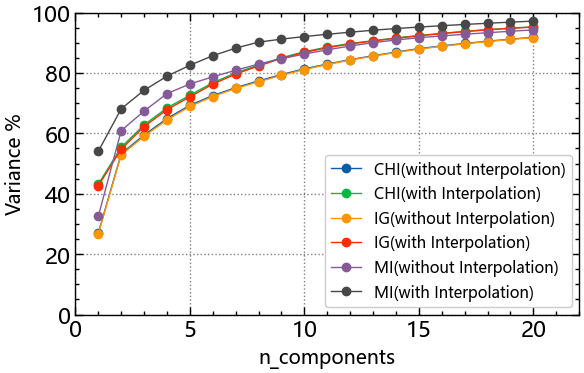

In [96]:
# 主成分分析
variance_cum = {}
components = 20
for idx,data_item in enumerate(data):
    pca = PCA(n_components=components)
    pca_data = split_data(data_item)
#     pca_data = standard_data(data_item)# 标准化数据
    pca.fit(pca_data)
    variance_cum[code[idx]] = np.cumsum(pca.explained_variance_ratio_ * 100)
with plt.style.context(['science','grid','notebook']):
    fig= plt.figure(figsize=(6.5,4),dpi=100)
    plt.ylim([0,100])
    plt.xlim([0,22])
    for num in range(6):
        plt.plot(np.arange(1,components+1,1),variance_cum[code[num]],linewidth=1,marker='o',label=code[num])
    plt.xlabel(r'n_components',fontdict={'size':14})
    plt.ylabel('Variance %',fontdict={'size':14})
    plt.legend(prop={'size':11})
    plt.show()

In [98]:
dist = {}
SC = {}
for idx,data_item in enumerate(data):
    print('----{}-----'.format(idx))
    cluster_data = split_data(data_item)
#     cluster_data = standard_data(data_item)# 标准化数据
    n_cluster = np.arange(2,15,1)
    print('cluster_data:{}'.format(cluster_data.shape))
    dist[code[idx]] = []
    SC[code[idx]] = []
    for n in n_cluster:
        model = KMeans(n_clusters=n,init='k-means++',max_iter=4000).fit(cluster_data)
        dist[code[idx]].append(model.inertia_)
        SC[code[idx]].append(silhouette_score(cluster_data,model.labels_))
# pprint(SC)      

----0-----
cluster_data:(3583, 94)
----1-----
cluster_data:(3583, 94)
----2-----
cluster_data:(3583, 94)
----3-----
cluster_data:(3583, 94)
----4-----
cluster_data:(3205, 94)
----5-----
cluster_data:(3205, 94)


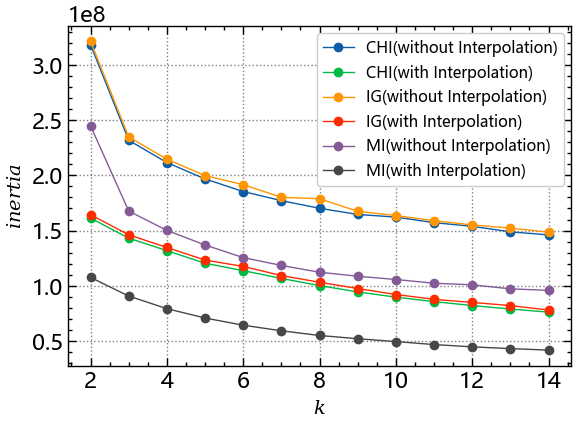

In [105]:
with plt.style.context(['science','grid','notebook']):
    fig= plt.figure(figsize=(6.5,4.5),dpi=100)
#     plt.xlim([0,14])
    for num in range(6):
        plt.plot(n_cluster,dist[code[num]],linewidth=1,marker='o',label=code[num])
    plt.xlabel(r'$k$',fontdict={'size':14})
    plt.ylabel(r'$inertia$',fontdict={'size':14})
    plt.legend(prop={'size':11})
    plt.show()

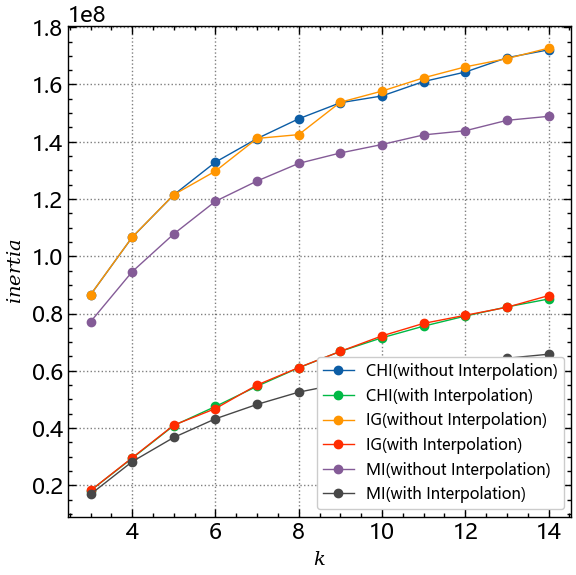

In [111]:
with plt.style.context(['science','grid','notebook']):
    fig= plt.figure(figsize=(6.5,6.5),dpi=100)
#     plt.xlim([0,14])
    for num in range(6):
        plt.plot(n_cluster[1:],np.cumsum(-1 * np.diff(dist[code[num]])),linewidth=1,marker='o',label=code[num])
    plt.xlabel(r'$k$',fontdict={'size':14})
    plt.ylabel(r'$inertia$',fontdict={'size':14})
    plt.legend(prop={'size':11})
    plt.show()

In [101]:
# 先使用PCA，再聚类
dist_pca = {}
SC_pca = {}
for idx,data_item in enumerate(data):
    print('----{}-----'.format(idx))
    cluster_data = split_data(data_item)
#     cluster_data = standard_data(data_item)# 标准化数据
    pca = PCA(n_components=code_component[idx])
    cluster_data = pca.fit_transform(cluster_data)
    print('cluster_data:{}'.format(cluster_data.shape))
    n_cluster = np.arange(2,15,1)
    dist_pca[code[idx]] = []
    SC_pca[code[idx]] = []
    for n in n_cluster:
        model = KMeans(n_clusters=n,init='k-means++',max_iter=4000).fit(cluster_data)
        dist_pca[code[idx]].append(model.inertia_)
        SC_pca[code[idx]].append(silhouette_score(cluster_data,model.labels_))

----0-----
cluster_data:(3583, 10)
----1-----
cluster_data:(3583, 7)
----2-----
cluster_data:(3583, 10)
----3-----
cluster_data:(3583, 7)
----4-----
cluster_data:(3205, 4)
----5-----
cluster_data:(3205, 7)


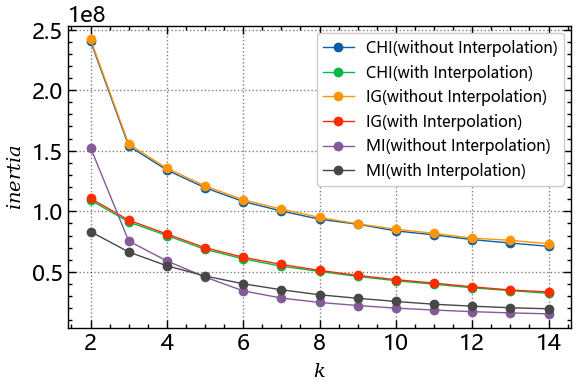

In [112]:
with plt.style.context(['science','grid','notebook']):
    fig= plt.figure(figsize=(6.5,4),dpi=100)
#     plt.xlim([0,14])
    for num in range(6):
        plt.plot(n_cluster,dist_pca[code[num]],linewidth=1,marker='o',label=code[num])
    plt.xlabel(r'$k$',fontdict={'size':14})
    plt.ylabel(r'$inertia$',fontdict={'size':14})
    plt.legend(prop={'size':11})
    plt.show()